# Taller de Segmentación RFM

En este notebook aprenderemos a realizar una segmentación RFM completa paso a paso. Se utilizarán datos de transacciones y se explicará cada parte del proceso. ¡Sigue las instrucciones y ejecuta cada celda para ir avanzando!

In [ ]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip
!unzip "Case 1_Online Retail.xlsx - Online Retail.csv.zip"

--2025-10-22 23:44:38--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip [following]
--2025-10-22 23:44:38--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

## 1. Preparación de Datos

Primero, cargaremos la librería necesaria y prepararemos los datos. Para este ejemplo, vamos a simular un DataFrame similar a una tabla de transacciones.

Ejecuta la siguiente celda y revisa el DataFrame resultante.

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de seaborn
sns.set(style='whitegrid')

In [ ]:
df = pd.read_csv('Case 1_Online Retail.xlsx - Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom


Convierta la variable InvoiceDate en tipo datetime con pd.to_datetime()

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
display(df.head())

/tmp/ipython-input-1426922412.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom


## 2. Limpieza y Enriquecimiento de los Datos

En esta sección, eliminamos filas con `CustomerID` nulo (si existieran) y registros con cantidades negativas o cero. Además, crearemos una nueva columna `TotalPrice` que es el producto de `Quantity` y `UnitPrice`.

Eliminar las filas con CustomerID nulo

In [ ]:
df.dropna(subset=['CustomerID'], inplace=True)
print("DataFrame después de eliminar filas con CustomerID nulo:")
display(df.head())

DataFrame después de eliminar filas con CustomerID nulo:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom


In [ ]:
df = df[df['Quantity'] > 0]
print("DataFrame después de eliminar registros con Quantity <= 0:")
display(df.head())

DataFrame después de eliminar registros con Quantity <= 0:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom


Eliminar registros con Quantity <= 0

In [ ]:
df = df[df['Quantity'] > 0]
print("DataFrame después de eliminar registros con Quantity <= 0:")
display(df.head())

DataFrame después de eliminar registros con Quantity <= 0:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom


In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
print("DataFrame después de agregar la columna TotalPrice:")
display(df.head())

DataFrame después de agregar la columna TotalPrice:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,"2,55",17850.0,United Kingdom,"2,552,552,552,552,552,55"
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,"3,393,393,393,393,393,39"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,"2,75",17850.0,United Kingdom,"2,752,752,752,752,752,752,752,75"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,"3,393,393,393,393,393,39"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,"3,393,393,393,393,393,39"


Asegure que Price este en float sino lo esta cambielo usando esto.   df["UnitPrice"] = df["UnitPrice"].apply(lambda x:x.replace(",","."))
df["UnitPrice"] = df["UnitPrice"].astype(float)

¿Que estoy haciendo ?

In [ ]:
df["UnitPrice"] = df["UnitPrice"].apply(lambda x:x.replace(",","."))
df["UnitPrice"] = df["UnitPrice"].astype(float)

Crear columna TotalPrice

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
print("DataFrame después de agregar la columna TotalPrice:")
display(df.head())

DataFrame después de agregar la columna TotalPrice:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## 3. Cálculo de las Métricas RFM

Calcularemos las siguientes métricas para cada cliente:

- **Recencia (R):** Días transcurridos desde la última compra hasta la fecha de corte.
- **Frecuencia (F):** Número de facturas únicas realizadas por el cliente.
- **Monetario (M):** Total gastado por el cliente.

Primero, definamos la fecha de snapshot (fecha de corte).

Definir la fecha de snapshot (por ejemplo, un día después del último registro)


In [ ]:
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
print(f"Fecha de snapshot: {snapshot_date}")

Fecha de snapshot: 2011-12-10 12:50:00


### 3.1 Agrupación por Cliente y Cálculo de R, F y M

Agruparemos el DataFrame por `CustomerID` y calcularemos:

- **Recency:** Días entre el `snapshot_date` y la última `InvoiceDate` de cada cliente.
- **Frecuencia:** Número único de facturas (`InvoiceNo`).
- **Monetario:** Suma de `TotalPrice`.

Utilice grupby con agg (lambda x: (snapshot_date - x.max()).days, nunique, sum )

In [ ]:
rfm = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (snapshot_date - x.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalPrice', 'sum')
).reset_index()

display(rfm.head())

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


AttributeError: 'float' object has no attribute 'replace'

Renombre las Columnas de manera correspondiente

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


## 4. Asignación de Puntajes RFM

Ahora, vamos a asignar puntajes a cada una de las métricas usando cuartiles. Para **Recency** asignaremos de forma inversa (más bajo es mejor) y para **Frecuencia** y **Monetario** de forma directa.


Asignar puntajes usando pd.qcut
https://pandas.pydata.org/docs/reference/api/pandas.qcut.html
Tenga en cuent si encesita duplicates= "drop" en algun momento
Y cuando los labels serian 1,2,3,4 y cuando 4,3,2,1

In [ ]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')

print("Tabla RFM con puntajes:")
display(rfm.head())

ValueError: Bin edges must be unique: Index([1.0, 1.0, 2.0, 5.0, 210.0], dtype='float64', name='Frequency').
You can drop duplicate edges by setting the 'duplicates' kwarg

In [ ]:
# Assign R_score (inverse) using pd.cut with q=4 and duplicates='drop'
rfm['R_score'] = pd.cut(rfm['Recency'], bins=4, labels=[4, 3, 2, 1], duplicates='drop')

# Assign F_score (direct) using pd.cut with q=4 and duplicates='drop'
rfm['F_score'] = pd.cut(rfm['Frequency'], bins=4, labels=[1, 2, 3, 4], duplicates='drop')


# Assign M_score (direct) using pd.cut with q=4 and duplicates='drop'
rfm['M_score'] = pd.cut(rfm['Monetary'], bins=4, labels=[1, 2, 3, 4], duplicates='drop')

print("Tabla RFM con puntajes:")
display(rfm.head())

Tabla RFM con puntajes:


,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score
0,12346.0,326,1,77183.60,1,1,2
1,12347.0,2,7,4310.00,4,1,1
2,12348.0,75,4,1797.24,4,1,1
3,12349.0,19,1,1757.55,4,1,1
4,12350.0,310,1,334.40,1,1,1


Cree RFM_Score que sea la concatenacion de texto de los anteriores score

### Puntajes RFM por Cuartiles

Los puntajes de Recencia (R), Frecuencia (F) y Monetario (M) se asignaron utilizando cuartiles de la siguiente manera:

- **Recencia (R_score):** Se asignó de forma inversa, donde el cuartil con menor recencia (más reciente) recibió el puntaje más alto (4), y el cuartil con mayor recencia recibió el puntaje más bajo (1).

- **Frecuencia (F_score):** Se asignó de forma directa, donde el cuartil con mayor frecuencia de compras recibió el puntaje más alto (4), y el cuartil con menor frecuencia recibió el puntaje más bajo (1).

- **Monetario (M_score):** Se asignó de forma directa, donde el cuartil con mayor gasto total recibió el puntaje más alto (4), y el cuartil con menor gasto total recibió el puntaje más bajo (1).

Puedes ver estos puntajes en las columnas `R_score`, `F_score` y `M_score` de la tabla `rfm`.

Tabla RFM con puntajes:


,Recency,Frequency,Monetary,R_score,M_score,F_score,RFM_Score,Segment
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,Champions
12347.0,2,7,4310.00,4,4,3,434,At Risk
12348.0,75,4,1797.24,2,4,2,224,Others
12349.0,19,1,1757.55,3,4,1,314,Others
12350.0,310,1,334.40,1,2,1,112,Champions
...,...,...,...,...,...,...,...,...
18280.0,278,1,180.60,1,1,1,111,Champions
18281.0,181,1,80.82,1,1,1,111,Champions
18282.0,8,3,176.60,4,1,2,421,At Risk


## 5. Definición de Segmentos

Con los puntajes asignados, podemos definir segmentos de clientes. Por ejemplo, podemos identificar:

- **Champions:** Clientes con puntajes altos en R, F y M (por ejemplo, `R_score >= 3`, `F_score >= 3`, `M_score >= 3`).
- **Loyal Customers:** Clientes leales que compran frecuentemente y tienen un gasto moderado a alto.
- **Potential Loyalist:** Clientes que muestran potencial, pero que aún no alcanzan los niveles de los Champions.
- **At Risk:** Clientes con puntajes bajos en recencia y frecuencia, lo que indica riesgo de abandono.

Puedes personalizar estos criterios según tu caso de negocio.

Ejecuta la siguiente celda para asignar segmentos.
 tiene que aplicarlo en una columna en su df
rfm['Segment'] = rfm.apply(segment_me, axis=1)


In [ ]:
def segment_me(row):
    # Convertir los puntajes a enteros para comparación
    r = int(row['R_score'])
    f = int(row['F_score'])
    m = int(row['M_score'])

    if r >= 3 and f >= 3 and m >= 3:
        return 'Champions'
    elif f >= 3 and m >= 2:
        return 'Loyal Customers'
    elif r >= 3 and f in [2,3] and m in [2,3]:
        return 'Potential Loyalist'
    elif r in [1,2] and f in [1,2]:
        return 'At Risk'
    else:
        return 'Others'



## 6. Visualizaciones

A continuación, crearemos algunas gráficas para visualizar la distribución de las métricas RFM y la cantidad de clientes por segmento.

### 6.1 Histogramas de Recency, Frequency y Monetary

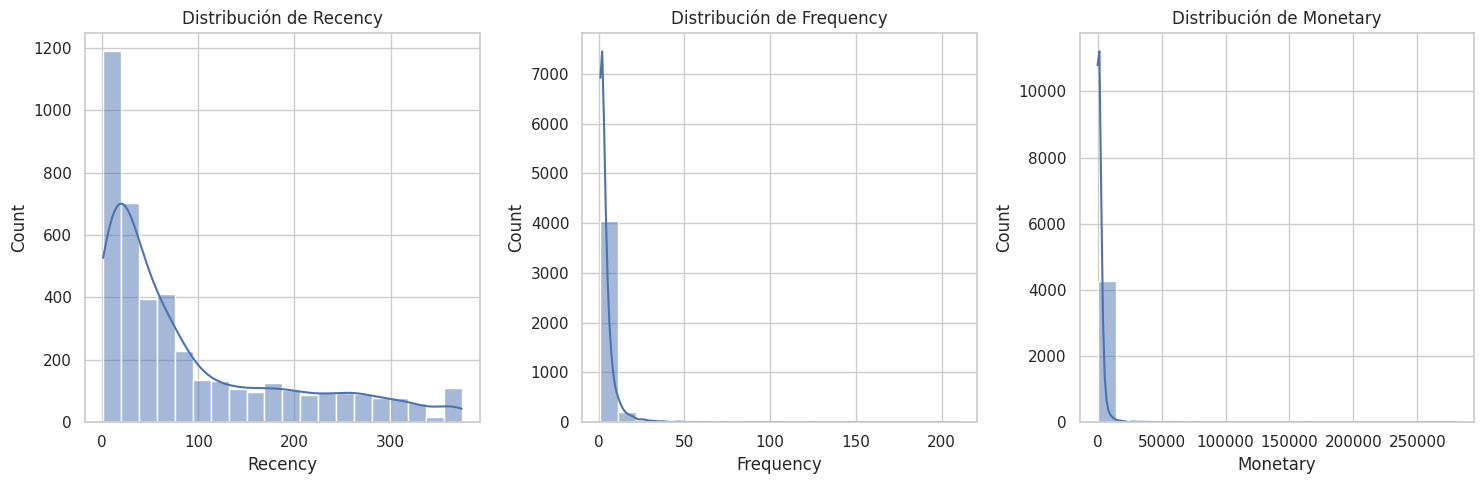

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(rfm['Recency'], bins=20, ax=axes[0], kde=True)
axes[0].set_title('Distribución de Recency')

sns.histplot(rfm['Frequency'], bins=20, ax=axes[1], kde=True)
axes[1].set_title('Distribución de Frequency')

sns.histplot(rfm['Monetary'], bins=20, ax=axes[2], kde=True)
axes[2].set_title('Distribución de Monetary')

plt.tight_layout()
plt.show()

In [ ]:
display(rfm.head())

,CustomerID,Recency,Frequency,Monetary,R_score
0,12346.0,326,1,77183.60,1
1,12347.0,2,7,4310.00,4
2,12348.0,75,4,1797.24,2
3,12349.0,19,1,1757.55,3
4,12350.0,310,1,334.40,1


### 6.2 Conteo de Clientes por Segmento (grafico)

In [ ]:
print("Conteo de Clientes por Puntaje de Recencia:")
display(rfm['R_score'].value_counts().sort_index())

print("\nConteo de Clientes por Puntaje de Frecuencia:")
display(rfm['F_score'].value_counts().sort_index())

print("\nConteo de Clientes por Puntaje Monetario:")
display(rfm['M_score'].value_counts().sort_index())

Conteo de Clientes por Puntaje de Recencia:


,count
R_score,
4,1126
3,1063
2,1066
1,1084



Conteo de Clientes por Puntaje de Frecuencia:


KeyError: 'F_score'

/tmp/ipython-input-4142716873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='R_score', ax=axes[0], palette='viridis')
/tmp/ipython-input-4142716873.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='F_score', ax=axes[1], palette='viridis')
/tmp/ipython-input-4142716873.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='M_score', ax=axes[2], palette='viridis')


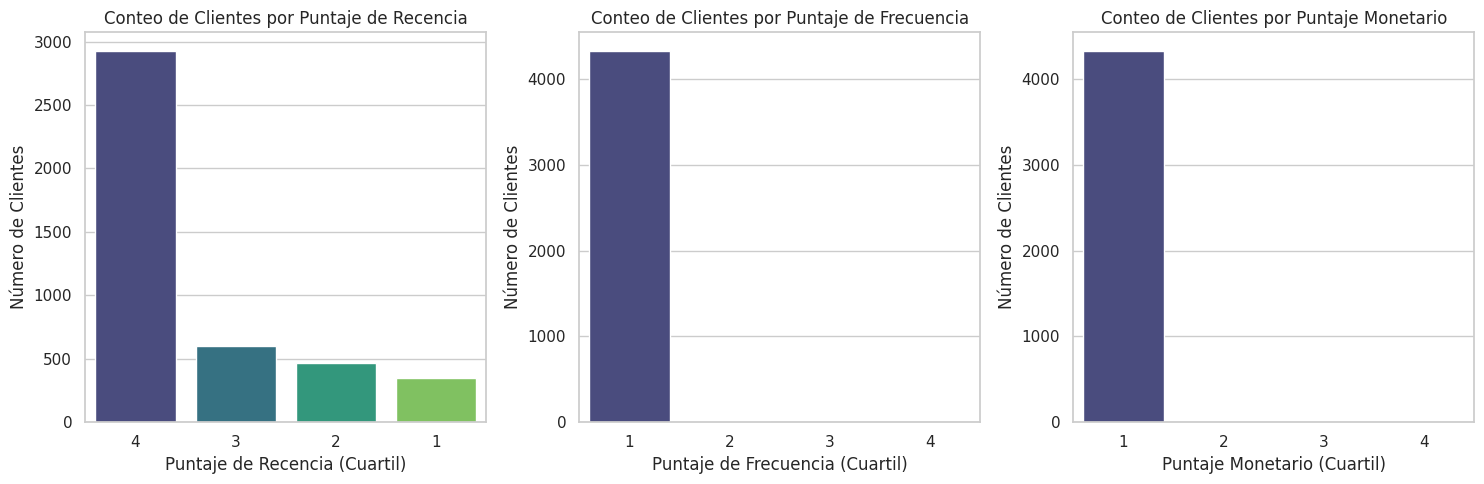

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(data=rfm, x='R_score', ax=axes[0], palette='viridis')
axes[0].set_title('Conteo de Clientes por Puntaje de Recencia')
axes[0].set_xlabel('Puntaje de Recencia (Cuartil)')
axes[0].set_ylabel('Número de Clientes')

sns.countplot(data=rfm, x='F_score', ax=axes[1], palette='viridis')
axes[1].set_title('Conteo de Clientes por Puntaje de Frecuencia')
axes[1].set_xlabel('Puntaje de Frecuencia (Cuartil)')
axes[1].set_ylabel('Número de Clientes')

sns.countplot(data=rfm, x='M_score', ax=axes[2], palette='viridis')
axes[2].set_title('Conteo de Clientes por Puntaje Monetario')
axes[2].set_xlabel('Puntaje Monetario (Cuartil)')
axes[2].set_ylabel('Número de Clientes')

plt.tight_layout()
plt.show()

### 6.3 Gráfico de Dispersión: Frequency vs Monetary

Visualizaremos la relación entre la frecuencia y el gasto, diferenciando por segmento.

/tmp/ipython-input-4096971270.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=rfm, x='Frequency', y='Monetary', palette='viridis', s=50, alpha=0.6)


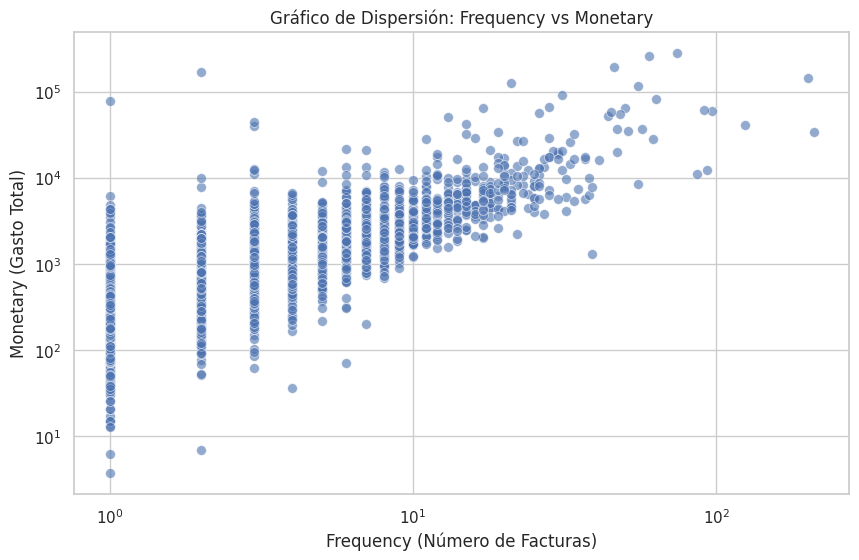

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', palette='viridis', s=50, alpha=0.6)
plt.title('Gráfico de Dispersión: Frequency vs Monetary')
plt.xlabel('Frequency (Número de Facturas)')
plt.ylabel('Monetary (Gasto Total)')
plt.xscale('log') # Escala logarítmica para Frequency debido a la distribución
plt.yscale('log') # Escala logarítmica para Monetary debido a la distribución
plt.show()

## 7. Conclusiones y Próximos Pasos

En este taller hemos:

1. **Preparado y limpiado los datos**: Se simuló un DataFrame, se convirtieron las fechas y se creó la columna `TotalPrice`.
2. **Calculado las métricas RFM** para cada cliente.
3. **Asignado puntajes** a cada métrica utilizando cuartiles.
4. **Definido segmentos** de clientes basados en los puntajes.
5. **Visualizado** la distribución de las métricas y los segmentos.

Utiliza estos resultados para diseñar estrategias de marketing específicas para cada segmento (por ejemplo, campañas de retención para los clientes "At Risk" o programas VIP para los "Champions").

¡Felicidades por completar el taller!

Clientes "At Risk" (En Riesgo): Estos clientes tienen una recencia y/o frecuencia bajas, lo que sugiere que podrían estar a punto de dejar de comprar o ya lo han hecho. El objetivo principal es reactivarlos y evitar la pérdida de clientes. Las campañas para este segmento podrían incluir:

Ofertas de reactivación: Enviar descuentos especiales, promociones exclusivas o incentivos para motivarlos a realizar una nueva compra.
Recordatorios personalizados: Enviar correos electrónicos o mensajes recordando su última compra y sugiriendo productos relacionados o novedades que podrían interesarles.
Encuestas de satisfacción: Preguntarles por qué han disminuido su actividad de compra para entender sus motivos y ofrecer soluciones.
Comunicación de valor: Destacar los beneficios de seguir siendo cliente, como acceso a contenido exclusivo, programas de puntos, o novedades.
Clientes "Champions": Estos son tus clientes más valiosos: compran recientemente, con frecuencia y gastan más. El objetivo principal es mantenerlos satisfechos, fomentar su lealtad y aprovechar su potencial como embajadores de marca. Las campañas para este segmento podrían incluir:

Programas VIP o de fidelización: Ofrecer acceso a niveles exclusivos con beneficios adicionales, como envío gratuito, acceso anticipado a productos, o eventos especiales.
Recompensas por lealtad: Otorgar puntos, descuentos o regalos por su continuo apoyo.
Solicitar reseñas y testimonios: Animarles a compartir sus experiencias positivas, lo que ayuda a atraer nuevos clientes.
Comunicación de agradecimiento: Enviar mensajes personalizados de agradecimiento por su lealtad y valor como clientes.
Ofrecer productos o servicios premium: Presentarles opciones de mayor valor que se alineen con su historial de gasto.